start: 2020/05/07 11:47:30
score[000]: 0.005802041654918155
score[001]: 0.004580470562219219
score[002]: 0.004769460185027219
score[003]: 0.004953250498638484
score[004]: 0.004538215512828181
score[005]: 0.004006954327440471
score[006]: 0.0046538239410843785
score[007]: 0.005343344324143406
score[008]: 0.004342319507569137
score[009]: 0.004364757270951092
score[010]: 0.0038261458673026767
score[011]: 0.005066357145294131
score[012]: 0.004357107538071392
score[013]: 0.0042593771257446456
score[014]: 0.004604957499174556
score[015]: 0.00429922165192087
score[016]: 0.005101335615045333
score[017]: 0.004717705618176304
score[018]: 0.004247608418926796
score[019]: 0.0034559581275214195
score[020]: 0.004225987476576432
score[021]: 0.003951449111691763
score[022]: 0.005221320942828345
score[023]: 0.0041356847274128805
score[024]: 0.003045036956881963
score[025]: 0.005289136116308435
score[026]: 0.00421763766758787
score[027]: 0.004759746156631883
score[028]: 0.004769253663994832
score[029]: 0

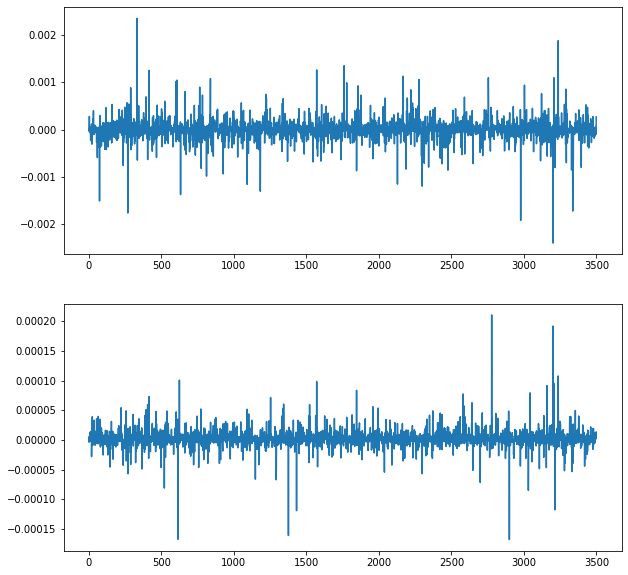

end: 2020/05/07 11:50:20


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:]
    y_predict = list(b.model.predict(x))

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v7"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression(csv)
    print(f"score[avg]: {b.calc_avg_score()}")
    plot(b)

    test_start = int(len(csv) * 0.8)  # 最後20%のデータでテスト
    b.data_train = csv[bitcoin.TRAIN_COLUMNS][:test_start]
    b.label_train = csv["result"][:test_start]
    b.train()
    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(b.model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()